# Day 7 - DC vs CSK

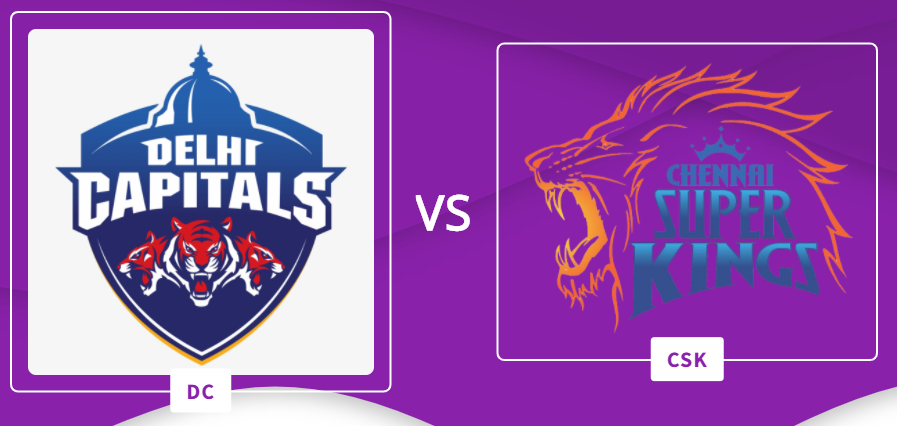

In [165]:
from IPython.display import Image
Image(filename='dc_vs_csk_day7.png')

In [166]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [167]:
#import data
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')


In [179]:
# as delhi team was earlier named delhi daredevils lets change the name to make comparisons easy.
matches = matches.replace('Delhi Daredevils', 'Delhi Capitals')
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')

# Q1. Who will win the match? (DC / CSK)

In [183]:
#checking total matches played by dc
matches_dc = matches[(matches['team1']=='Delhi Capitals')|(matches['team2']=='Delhi Capitals')]

wins_dc = np.sum(matches_dc.winner == 'Delhi Capitals')

print("Total matches played by dc:", matches_dc.shape[0])
print("Total matches won by dc:", wins_dc)
print("dc winning percentage:", (wins_dc/matches_dc.shape[0]*100))

Total matches played by dc: 177
Total matches won by dc: 77
dc winning percentage: 43.50282485875706


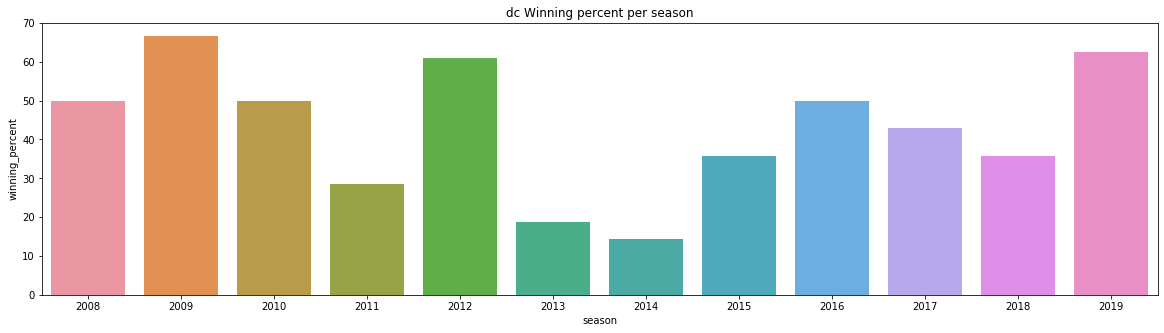

In [184]:
#checking dc matches winning percentage per season

dc_wins = matches_dc[matches_dc.winner == 'Delhi Capitals']
# matches['season'].unique()
dc_season_wins = dc_wins.groupby('season')['winner'].count().reset_index()
dc_season_wins['total_matches_dc']=matches_dc.groupby('season')['id'].count().values
dc_season_wins['winning_percent']= (dc_season_wins.winner/dc_season_wins.total_matches_dc)*100

plt.figure(figsize=(20,5))
sns.barplot(x=dc_season_wins['season'], y = dc_season_wins['winning_percent'])
plt.title("dc Winning percent per season")
plt.show()

In [185]:
#checking total matches played by csk
matches_csk = matches[(matches['team1']=='Chennai Super Kings')|(matches['team2']=='Chennai Super Kings')]

wins_csk = np.sum(matches_csk.winner == 'Chennai Super Kings')

print("Total matches played by csk:", matches_csk.shape[0])
print("Total matches won by csk:", wins_csk)
print("csk winning percentage:", (wins_csk/matches_csk.shape[0]*100))

Total matches played by csk: 164
Total matches won by csk: 100
csk winning percentage: 60.97560975609756


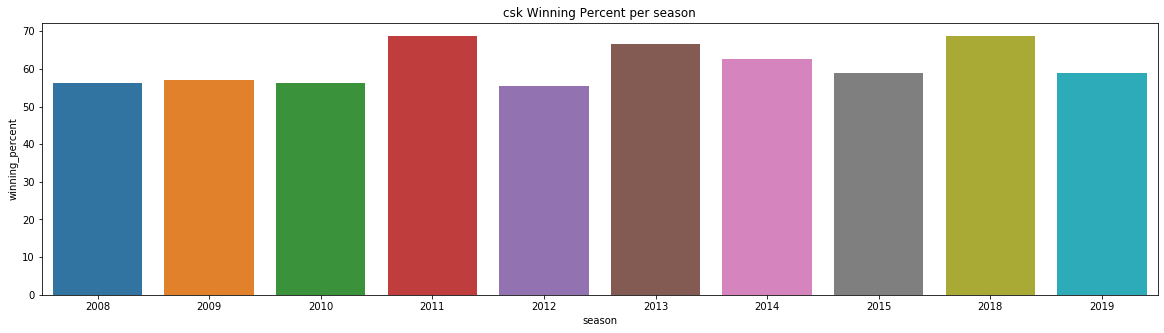

In [186]:
#checking Chennai Super Kings matches winning percentage per season

csk_wins = matches_csk[matches_csk.winner == 'Chennai Super Kings']
# matches['season'].unique()
csk_season_wins = csk_wins.groupby('season')['winner'].count().reset_index()
csk_season_wins['total_matches_csk']=matches_csk.groupby('season')['id'].count().values
csk_season_wins['winning_percent']= (csk_season_wins.winner/csk_season_wins.total_matches_csk)*100

plt.figure(figsize=(20,5))
sns.barplot(x=csk_season_wins['season'], y = csk_season_wins['winning_percent'])
plt.title('csk Winning Percent per season')
plt.show()

In [187]:
#checking matches between 'dc' and 'csk'
matches_dc_csk = matches[((matches['team1']=='Delhi Capitals')&(matches['team2']=='Chennai Super Kings'))|((matches['team2']=='Delhi Capitals')&(matches['team1']=='Chennai Super Kings'))]
matches_dc_csk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Delhi Capitals,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
86,87,2008,Delhi,2008-05-08,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN
124,125,2009,Durban,2009-04-23,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Delhi Capitals,9,0,AB de Villiers,Kingsmead,BR Doctrove,SJA Taufel,NaN
140,141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium,DJ Harper,RE Koertzen,NaN
184,185,2010,Delhi,2010-03-19,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,5,ML Hayden,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN


season  winner             
2008    Chennai Super Kings     50.000000
        Delhi Capitals          50.000000
2009    Chennai Super Kings     50.000000
        Delhi Capitals          50.000000
2010    Chennai Super Kings     50.000000
        Delhi Capitals          50.000000
2011    Chennai Super Kings    100.000000
2012    Chennai Super Kings     66.666667
        Delhi Capitals          33.333333
2013    Chennai Super Kings    100.000000
2014    Chennai Super Kings    100.000000
2015    Chennai Super Kings     50.000000
        Delhi Capitals          50.000000
2018    Chennai Super Kings     50.000000
        Delhi Capitals          50.000000
2019    Chennai Super Kings    100.000000
Name: winner, dtype: float64

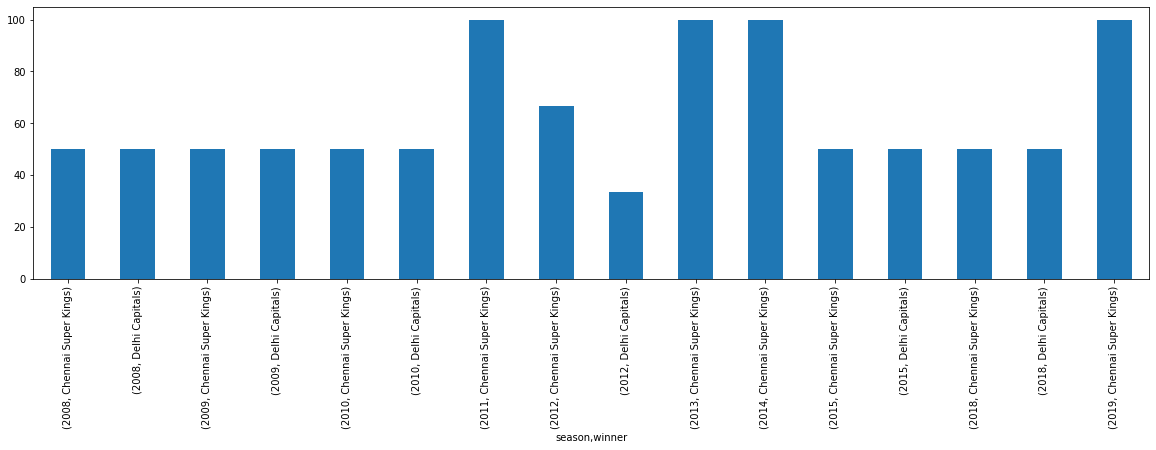

In [189]:
#Now lets see how dc has performed over csk


res = matches_dc_csk.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

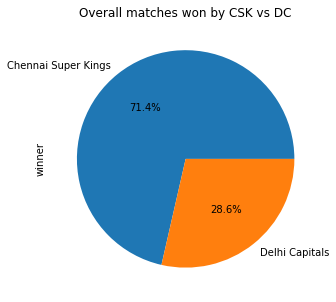

In [195]:
# checking  overall matches won by CSK and DC
plt.title("Overall matches won by CSK vs DC")
matches_dc_csk.winner.value_counts().plot('pie', autopct='%1.1f%%', figsize=(20,5))
plt.show()

**Inference:**
    - As per the historic data we can say that CSK has won more matches than DC in the past and clearly has a very high winning percentage comparatively.

# Q2. How many runs will CSK score in the match?

In [198]:
#getting rows where CSK bats and DC bowls
cskb_dcf = deliveries[(deliveries.batting_team=='Chennai Super Kings')&(deliveries.bowling_team=='Delhi Capitals')]
cskb_dcf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18372,79,1,Chennai Super Kings,Delhi Capitals,1,1,PA Patel,SP Fleming,GD McGrath,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
18373,79,1,Chennai Super Kings,Delhi Capitals,1,2,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18374,79,1,Chennai Super Kings,Delhi Capitals,1,3,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18375,79,1,Chennai Super Kings,Delhi Capitals,1,4,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18376,79,1,Chennai Super Kings,Delhi Capitals,1,5,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN


In [200]:
tot_runs_cskb = cskb_dcf.groupby('match_id')['total_runs'].sum()
tot_runs_cskb

match_id
79       169
87       188
125      180
141      163
185      190
224      112
289      176
318      110
364      115
380      222
404      169
446      168
465      177
483      181
519      150
565      119
7923     218
7945     130
11141    157
11341    186
11414    162
Name: total_runs, dtype: int64

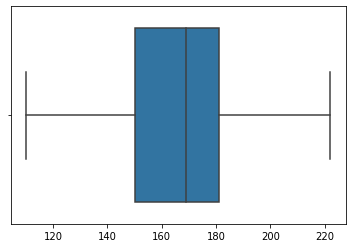

In [201]:
sns.boxplot(tot_runs_cskb.values)

In [203]:
#checking basic stats
tot_runs_cskb.describe()

count     21.000000
mean     163.904762
std       31.931027
min      110.000000
25%      150.000000
50%      169.000000
75%      181.000000
max      222.000000
Name: total_runs, dtype: float64

Text(0, 0.5, 'Total Runs')

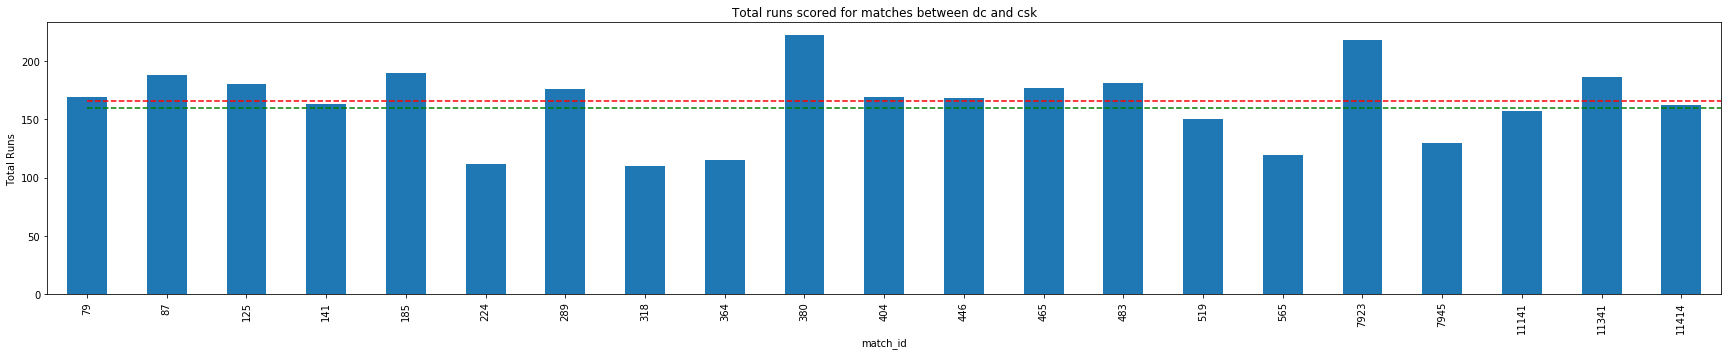

In [210]:
plt.title("Total runs scored for matches between dc and csk")
tot_runs_cskb.plot(kind='bar', figsize=(30,5))
plt.hlines(xmin=0, xmax=30, y=166, linestyle='--', color='r')
plt.hlines(xmin=0, xmax=30, y=160, linestyle='--', color='g')
plt.ylabel("Total Runs")


**Inference:**
    - CSK might score around 166-175 as on average they score around 169.

# Q3. How many wickets will CSK take from the 91st ball to the 120th ball?

In [220]:
#getting all rows where dc is batting against csk
dcb_cskf = deliveries[(deliveries.batting_team=='Delhi Capitals')&(deliveries.bowling_team=='Chennai Super Kings')]

#getting all rows where players where disdcssed i.e wickets were taken vs csk
dcb_cskf_wickets = dcb_cskf[dcb_cskf.player_dismissed.notnull()]

#getting only wickets where 91st ball(16th over) to 120th ball(20th)
dcb_cskf_wickets1620 = dcb_cskf_wickets[dcb_cskf_wickets.over.isin(range(16,21))]

#counting wickets taken by csk taken during overs 16-20 every match
dcb_cskf_wickets1620.groupby('match_id')['player_dismissed'].count()

match_id
87       3
125      1
141      5
185      2
289      3
380      3
404      3
446      3
465      1
519      4
565      1
7923     1
11141    4
11341    2
11414    4
Name: player_dismissed, dtype: int64

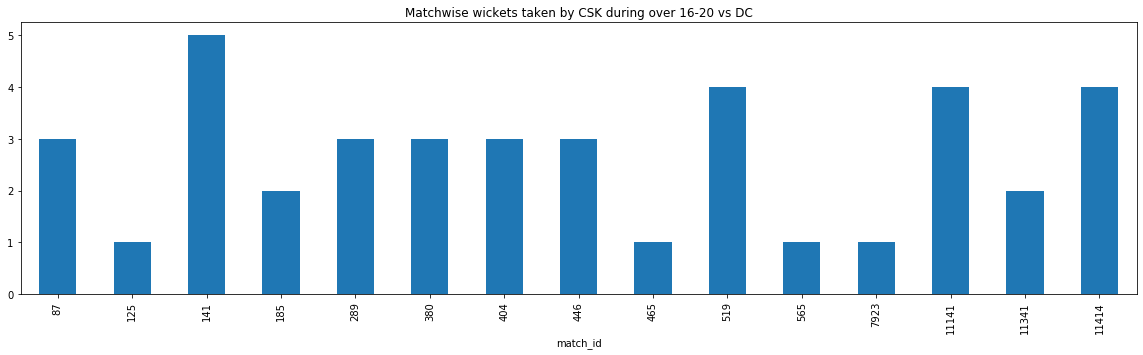

In [221]:
#wickets taken by CSK taken during overs 16-20 every match
dcb_cskf_wicks1620 = dcb_cskf_wickets1620.groupby('match_id')['player_dismissed'].count()

#checking visually wickets taken by CSK taken during overs 6-15 every match
dcb_cskf_wicks1620.plot(kind='bar', figsize=(20,5))
plt.title("Matchwise wickets taken by CSK during over 16-20 vs DC")
plt.show()

In [223]:
dcb_cskf_wicks1620.describe()

count    15.000000
mean      2.666667
std       1.290994
min       1.000000
25%       1.500000
50%       3.000000
75%       3.500000
max       5.000000
Name: player_dismissed, dtype: float64

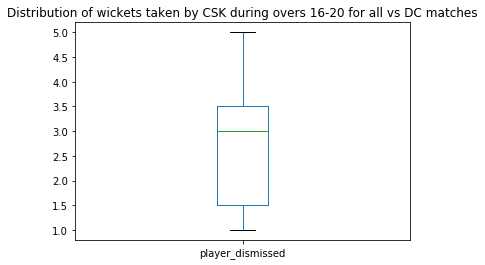

In [225]:
#checking distribution of wickets taken by CSK vs DC during wickets 16-20
dcb_cskf_wicks1620.plot(kind='box')
plt.title("Distribution of wickets taken by CSK during overs 16-20 for all vs DC matches")
plt.show()

In [227]:
#getting all rows where dc is batting
dcb = deliveries[(deliveries.batting_team=='Delhi Capitals')]

#getting all rows where players where disdcssed i.e wickets were taken 
dcb_wickets = dcb[dcb.player_dismissed.notnull()]

#getting only wickets where over 6-15
dcb_wickets1620 = dcb_wickets[dcb_wickets.over.isin(range(16,21))]

#counting wickets lost by dc during overs 6-15 every match
dcb_wickets1620.groupby('match_id')['player_dismissed'].count().head()

match_id
5     3
9     2
15    2
18    3
21    1
Name: player_dismissed, dtype: int64

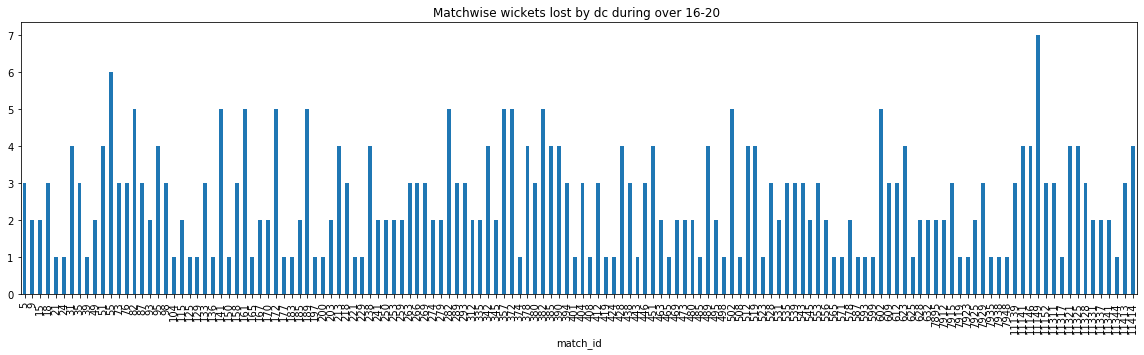

In [230]:
#wickets lost by dc taken during overs 16-20 every match
dcb_wicks1620 = dcb_wickets1620.groupby('match_id')['player_dismissed'].count()

#checking visually wickets lost by dc taken during overs 16-20 every match
dcb_wicks1620.plot(kind='bar', figsize=(20,5))
plt.title("Matchwise wickets lost by dc during over 16-20 ")
plt.show()

In [231]:
dcb_wicks1620.describe()

count    142.000000
mean       2.549296
std        1.334631
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: player_dismissed, dtype: float64

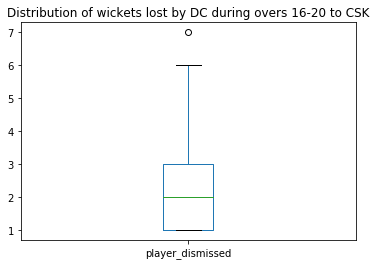

In [232]:
#checking distribution of wickets lost by DC during wickets 16-20 to CSK
dcb_wicks1620.plot(kind='box')
plt.title("Distribution of wickets lost by DC during overs 16-20 to CSK")
plt.show()

**Inference:**
    * Checking wickets DC lost during overs 16-20 when playing against CSK:
        - on average DC lost over 3-4 wickets mostly during overs 16-20 (91st ball - 120th ball)

# Q4. How many balls will CSK take to score 100 runs?

In [249]:
#getting rows where CSK bats and DC bowls
cskb_dcf = deliveries[(deliveries.batting_team=='Chennai Super Kings')&(deliveries.bowling_team=='Delhi Capitals')]
cskb_dcf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18372,79,1,Chennai Super Kings,Delhi Capitals,1,1,PA Patel,SP Fleming,GD McGrath,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
18373,79,1,Chennai Super Kings,Delhi Capitals,1,2,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18374,79,1,Chennai Super Kings,Delhi Capitals,1,3,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18375,79,1,Chennai Super Kings,Delhi Capitals,1,4,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18376,79,1,Chennai Super Kings,Delhi Capitals,1,5,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN


In [296]:
#getting cumulative sum
csk_runs_cumsum = cskb_dcf.groupby('match_id').total_runs.cumsum().reset_index()

# csk_runs_cumsum[csk_runs_cumsum.total_runs==100]
csk_runs_100 = csk_runs_cumsum[csk_runs_cumsum.total_runs==100]

csk_runs_100_balls = pd.DataFrame(map(lambda x: cskb_dcf.iloc[x][['over', 'ball']],csk_runs_100.index))

csk_runs_100_tot = pd.concat([csk_runs_100, csk_runs_100_balls], axis=1)

# cskb_dcf.merge(csk_runs_100, )

cskb_dcf.iloc[csk_runs_100.index][['match_id', 'over', 'ball']]

,match_id,over,ball
20421,87,11,6
28958,125,10,3
52945,224,19,8
52946,224,19,9
74914,318,19,2
74915,318,19,3
74916,318,19,4
105713,446,14,6
123022,519,13,1
123023,519,13,2


# Q5. How many no-balls will be bowled in total during the match?

In [236]:
#checking no bowls only when CSK is playing
noballs_csk = noballs_bowls[(noballs_bowls.batting_team=='Chennai Super Kings')|(noballs_bowls.bowling_team=='Chennai Super Kings')]

noballs_csk.groupby('match_id')['ball'].count().head()

match_id
61    1
67    4
71    3
79    4
83    1
Name: ball, dtype: int64

In [237]:
nb_csk_count = noballs_csk.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Chennai Super Kings in a match: {np.mean(nb_csk_count)}')
print(f'Median  wide bowls by Chennai Super Kings in a match: {np.median(nb_csk_count)}')
print(f'Minimum  wide bowls by Chennai Super Kings in a match: {np.min(nb_csk_count)}')
print(f'Maximum  wide bowls by Chennai Super Kings in a match: {np.max(nb_csk_count)}')

Average wide bowls by Chennai Super Kings in a match: 1.6373626373626373
Median  wide bowls by Chennai Super Kings in a match: 1.0
Minimum  wide bowls by Chennai Super Kings in a match: 1
Maximum  wide bowls by Chennai Super Kings in a match: 4


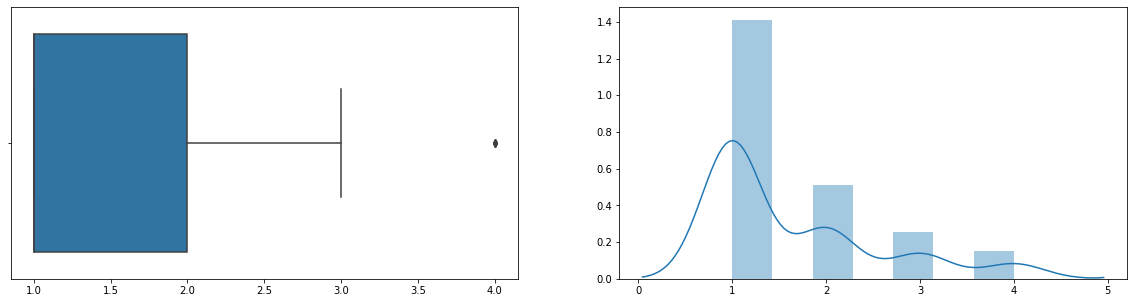

In [238]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_csk_count, ax = ax[0])
sns.distplot(nb_csk_count, ax=ax[1])


In [242]:
#checking wide bowls only when DC is playing
noballs_dc = noballs_bowls[(noballs_bowls.batting_team=='Delhi Capitals')|(noballs_bowls.bowling_team=='Delhi Capitals')]

noballs_dc.groupby('match_id')['ball'].count().head()

match_id
15    3
21    2
24    1
39    1
55    1
Name: ball, dtype: int64

In [243]:
nb_dc_count = noballs_dc.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Delhi Capitals in a match: {np.mean(nb_dc_count)}')
print(f'Median  wide bowls by Delhi Capitals in a match: {np.median(nb_dc_count)}')
print(f'Minimum  wide bowls by Delhi Capitals in a match: {np.min(nb_dc_count)}')
print(f'Maximum  wide bowls by Delhi Capitals in a match: {np.max(nb_dc_count)}')

Average wide bowls by Delhi Capitals in a match: 1.66
Median  wide bowls by Delhi Capitals in a match: 1.0
Minimum  wide bowls by Delhi Capitals in a match: 1
Maximum  wide bowls by Delhi Capitals in a match: 5


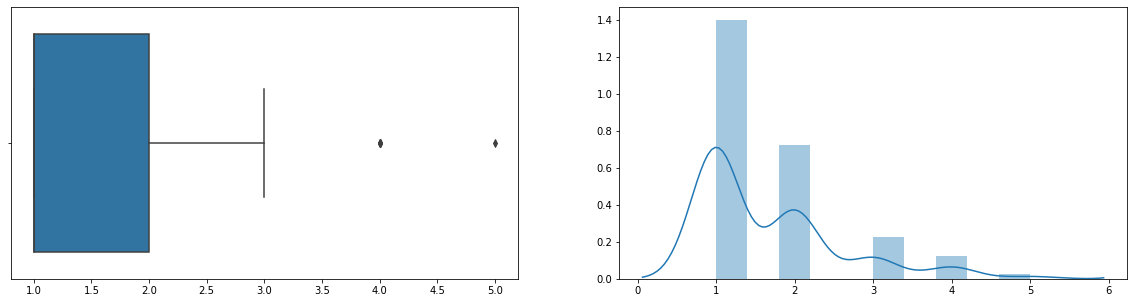

In [244]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_dc_count, ax = ax[0])
sns.distplot(nb_dc_count, ax=ax[1])


In [245]:
#lets also check the matches played between dcand csk
nb_csk_dc= noballs_bowls[((noballs_bowls.batting_team=='Delhi Capitals')&(noballs_bowls.bowling_team=='Chennai Super Kings'))|((noballs_bowls.batting_team=='Chennai Super Kings')&(noballs_bowls.bowling_team=='Delhi Capitals'))]

nb_csk_dc.groupby('match_id')['ball'].count()

match_id
79       4
87       2
125      1
141      1
185      1
224      2
289      1
519      1
7923     1
11141    1
11341    1
11414    1
Name: ball, dtype: int64

In [246]:
nb_cskdc = nb_csk_dc.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (csk and dc) match: {np.mean(nb_cskdc)}')
print(f'Median  wide bowls in (csk and dc) match: {np.median(nb_cskdc)}')
print(f'Minimum  wide bowls in (csk and dc) match: {np.min(nb_cskdc)}')
print(f'Maximum  wide bowls in (csk and dc) match: {np.max(nb_cskdc)}')

Average wide bowls in (csk and dc) match: 1.4166666666666667
Median  wide bowls in (csk and dc) match: 1.0
Minimum  wide bowls in (csk and dc) match: 1
Maximum  wide bowls in (csk and dc) match: 4


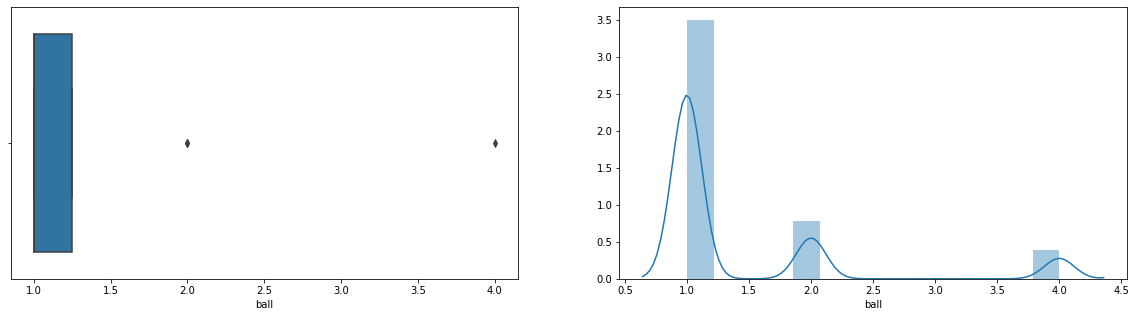

In [247]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_cskdc, ax = ax[0])
sns.distplot(nb_cskdc, ax=ax[1])

**Inference:**
    So from all the plots and graphs above we have understood 
        - CSK on an average has around 1 no bowls in a match
        - DC on an average has around 1 no bowls in a match
        - we also checked CSK-DC match, where we found on average they have 1 noball bowls